# One-Dimensional Convolution #

Convolutional networks turn out to be useful not only (two-dimensional) images, but also on things like time-series (one-dimensional) and video (three-dimensional).

We've seen how convolutional networks can learn to extract features from (two-dimensional) images. It turns out that convnets can also learn to extract features from things like time-series (one-dimensional) and video (three-dimensional).

In this example, we'll see what convolution looks like on a time-series.

The time series we'll use is from Walmart store 44.

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# Load data
walmart_file_path = 'https://www.dropbox.com/s/ns7envvzoqyypui/Walmart_Store_sales.csv?dl=1'
walmart_data = pd.read_csv(walmart_file_path, parse_dates=['Date'], dayfirst=True) 
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


<Axes: xlabel='Date'>

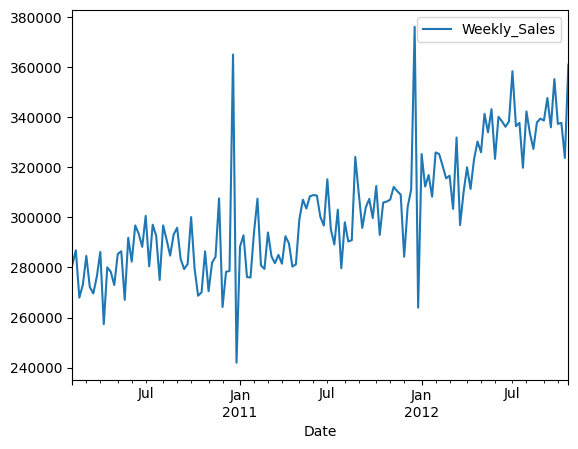

In [3]:
weekly_sales = walmart_data[walmart_data.Store == 44].groupby('Date')[['Weekly_Sales']].sum()
weekly_sales.plot.line()

In [4]:
weekly_sales.shape

(143, 1)

In [5]:
detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

In [8]:
print(detrend)

tf.Tensor([-1.  1.], shape=(2,), dtype=float32)


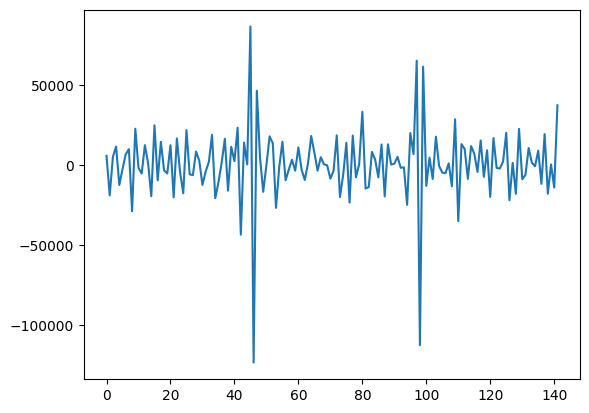

In [6]:
# UNCOMMENT ONE
kernel = detrend
#kernel = average
#kernel = spencer

# Reformat for TensorFlow
ts_data = weekly_sales.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();

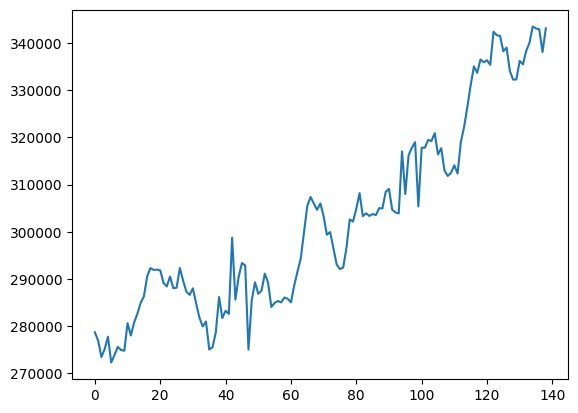

In [ ]:
# UNCOMMENT ONE
#kernel = detrend
kernel = average
#kernel = spencer

# Reformat for TensorFlow
ts_data = weekly_sales.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();

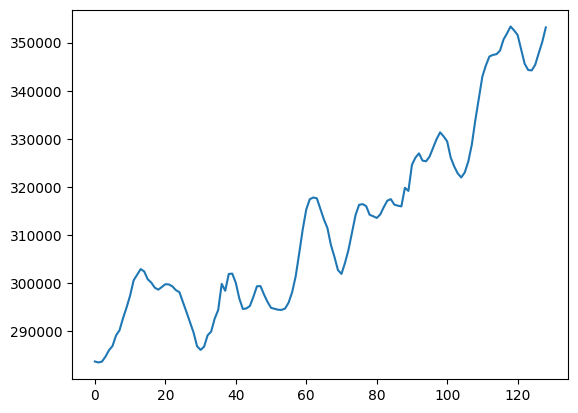

In [ ]:
# UNCOMMENT ONE
#kernel = detrend
#kernel = average
kernel = spencer

# Reformat for TensorFlow
ts_data = weekly_sales.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();

The `detrend` kernel filters for *changes* in the series, while `average` and `spencer` are both "smoothers" that filter for low-frequency components in the series.

If you were interested in predicting sales, you might train a convnet on time-series like this one. It would try to learn what features in those series are most informative for the prediction.



In [ ]:
(chr(72)+chr(97)+chr(112)+chr(112)+chr(121)+chr(32)+chr(66)+chr(105)+chr(114)+chr(116)+chr(104)+chr(100)+chr(97)+chr(121)+chr(32)+chr(83)+chr(104)+chr(111)+chr(105)+chr(99)+chr(104)+chr(105)+chr(33))

'Happy Birthday Shoichi!'

### Take-Away

Though convnets are not often the best choice on their own for these kinds of problems, they are often incorporated into other models for their feature extraction capabilities.